In [9]:
import pandas as pd
import numpy as np
pcos_data = pd.read_csv('PCOS_data_without_infertility.csv')
pcos_data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [100]:
test_data = pd.read_csv('PCOS_infertility.csv')
test_data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [142]:
pcosdata = pcos_data
    
load_col = []
for col in pcosdata.columns:
    if len(pcosdata[col].unique())!=2 :
        load_col.append(col)
        

new_pcos = pcosdata.drop(columns=load_col)


In [132]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd

def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

def entropy3(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  val = -(vc * np.log(vc)/np.log(base)).sum()
  print(val)
  return -(vc * np.log(vc)/np.log(base)).sum()

def entropy4(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()
    
    




In [10]:
pcos_data.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44'], inplace=True)

In [11]:
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [12]:
pcos_data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(pcos_data['II    beta-HCG(mIU/mL)'], errors='coerce').fillna(0).astype(int)
pcos_data['AMH(ng/mL)'] = pd.to_numeric(pcos_data['AMH(ng/mL)'], errors='coerce').fillna(0).astype(int)

In [13]:
importances = pcos_data.drop('PCOS (Y/N)', axis=1).apply(lambda x: x.corr(pcos_data['PCOS (Y/N)']))
indices = np.argsort(importances)
print(importances[indices])

Cycle length(days)       -0.178480
 Age (yrs)               -0.168513
Marraige Status (Yrs)    -0.112897
No. of aborptions        -0.057158
PRG(ng/mL)               -0.043834
FSH(mIU/mL)              -0.030319
  I   beta-HCG(mIU/mL)   -0.027617
Pregnant(Y/N)            -0.027565
FSH/LH                   -0.018336
TSH (mIU/L)              -0.010140
PRL(ng/mL)                0.005143
BP _Systolic (mmHg)       0.007942
Waist:Hip Ratio           0.012386
II    beta-HCG(mIU/mL)    0.012764
Blood Group               0.036433
RR (breaths/min)          0.036928
BP _Diastolic (mmHg)      0.038032
RBS(mg/dl)                0.048922
LH(mIU/mL)                0.063879
Reg.Exercise(Y/N)         0.065337
Height(Cm)                0.068254
Vit D3 (ng/mL)            0.085494
Hb(g/dl)                  0.087170
Pulse rate(bpm)           0.091821
Avg. F size (R) (mm)      0.097690
Endometrium (mm)          0.106648
Avg. F size (L) (mm)      0.132992
Hip(inch)                 0.162297
Waist(inch)         

In [14]:
importances["Fast food (Y/N)"]

0.37793294801489896

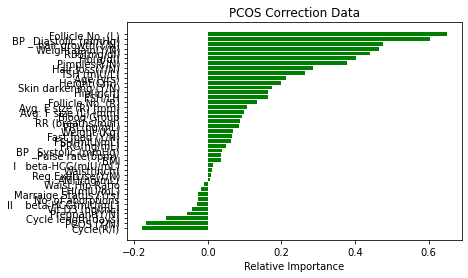

In [15]:
import matplotlib.pyplot as plt

names= pcos_data.columns
plt.title('PCOS Correction Data')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.2:
        print(names[i])

 Age (yrs)
Hb(g/dl)
TSH (mIU/L)
RBS(mg/dl)
Weight gain(Y/N)
hair growth(Y/N)
Hair loss(Y/N)
Pimples(Y/N)
BP _Diastolic (mmHg)
Follicle No. (L)


In [17]:
pcos_data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [18]:
new_data = pcos_data[[' Age (yrs)', 'Hb(g/dl)', 'Hb(g/dl)',
                    'Weight gain(Y/N)', 'RBS(mg/dl)', 'TSH (mIU/L)', 'hair growth(Y/N)',
                     'Hair loss(Y/N)', 'Pimples(Y/N)','BP _Diastolic (mmHg)','Follicle No. (L)']]


In [19]:
new_data

,Age (yrs),Hb(g/dl),Hb(g/dl),Weight gain(Y/N),RBS(mg/dl),TSH (mIU/L),hair growth(Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Diastolic (mmHg),Follicle No. (L)
0,28,10.48,10.48,0,92.0,0.68,0,0,0,80,3
1,36,11.70,11.70,0,92.0,3.16,0,0,0,70,3
2,33,11.80,11.80,0,84.0,2.54,0,1,1,80,13
3,37,12.00,12.00,0,76.0,16.41,0,0,0,70,2
4,25,10.00,10.00,0,84.0,3.57,0,1,0,80,3
...,...,...,...,...,...,...,...,...,...,...,...
536,35,11.00,11.00,0,92.0,1.11,0,0,0,70,1
537,30,10.80,10.80,1,108.0,2.05,0,0,0,70,9
538,36,10.80,10.80,0,92.0,2.87,0,0,0,80,1
539,27,12.00,12.00,0,115.0,2.50,0,0,1,70,7


In [20]:
# computing correllation between data
print(new_data.shape)
for i in range(0,len(new_data.columns)):
    for j in  range(0,len(new_data.columns)):
        if i!=j:
            corr_1=np.abs(new_data[new_data.columns[i]].corr(new_data[new_data.columns[j]]))
            if corr_1 <0.3:
                print( new_data.columns[i] , " is not correlated  with ", new_data.columns[j])
            elif corr_1>0.75:
                print( new_data.columns[i] , " is highly  correlated  with ", new_data.columns[j])

(541, 11)


ValueError: operands could not be broadcast together with shapes (541,) (541,2) 

In [21]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [22]:
y_label = pcos_data['PCOS (Y/N)']
x_data = new_data

In [23]:
mutual_info = mutual_info_regression(x_data, y_label)

<AxesSubplot:>

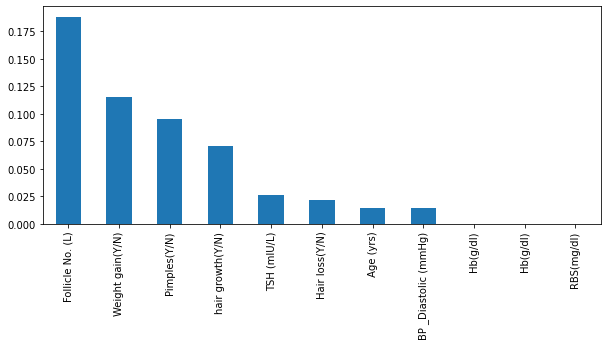

In [24]:
mi = pd.Series(mutual_info)
mi.index = x_data.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [25]:
x_data.columns

Index([' Age (yrs)', 'Hb(g/dl)', 'Hb(g/dl)', 'Weight gain(Y/N)', 'RBS(mg/dl)',
       'TSH (mIU/L)', 'hair growth(Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)'],
      dtype='object')

In [ ]:
X = x_data.drop(columns=[' Age (yrs)', 'Hb(g/dl)', 'RBS(mg/dl)', 'hair growth(Y/N)', 'TSH (mIU/L)'])
y = y_label
X.head(2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

svm_gridcv = GridSearchCV(SVC(gamma=10), {
    "C":[1, 10, 20], 
    'kernel' : ['rbf', 'linear']
}, cv=3, return_train_score=False)

svm_gridcv.fit(X, y)

In [27]:
dataset  = X
dataset['label'] = y 
dataset

,Weight gain(Y/N),TSH (mIU/L),hair growth(Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Diastolic (mmHg),Follicle No. (L),label
0,0,0.68,0,0,0,80,3,0
1,0,3.16,0,0,0,70,3,0
2,0,2.54,0,1,1,80,13,1
3,0,16.41,0,0,0,70,2,0
4,0,3.57,0,1,0,80,3,0
...,...,...,...,...,...,...,...,...
536,0,1.11,0,0,0,70,1,0
537,1,2.05,0,0,0,70,9,0
538,0,2.87,0,0,0,80,1,0
539,0,2.50,0,0,1,70,7,0


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset[['TSH (mIU/L)', 'BP _Diastolic (mmHg)']] = scaler.fit_transform(dataset[['TSH (mIU/L)', 'BP _Diastolic (mmHg)']])
dataset.head(2)

,Weight gain(Y/N),TSH (mIU/L),hair growth(Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Diastolic (mmHg),Follicle No. (L),label
0,0,0.009852,0,0,0,0.782609,3,0
1,0,0.048030,0,0,0,0.673913,3,0


In [35]:
import pandas as pd
dataset.to_csv('pcos_final_dataset.csv')
print('saving complete')

saving complete
